# 集合与映射

> 本实践内容将介绍人工智能领域的经典数据集 MNIST，理解集合的基本概念及其在机器学习中的实际应用。

## 1. 典型数据集

在现代人工智能和数据分析领域，集合的概念广泛存在于数据集中。下面列出一些经典数据集：

- **MNIST**：手写数字图像数据集（本课重点）
- **CIFAR-10**：10类彩色图片（如飞机、狗、汽车）
- **ImageNet**：包含百万级图片的超大型图像识别数据集
- **IMDB**：电影评论数据集，用于情感分析
- **Boston Housing**：预测房价的经典结构化数据集

## 2. MNIST 数据集

MNIST（Modified National Institute of Standards and Technology）数据集是一个机器学习中非常经典的图像数据集，包含 70,000 张 28x28 灰度图像，每张图像是一个 0-9 的手写数字。

- **每张图像**：28×28 = 784 个像素点
- **每个图像有一个标签**：0 到 9 的数字

我们将在本节课中以 MNIST 为例，理解集合的**基本操作**与**数学意义**。


### 2.1 下载 MNIST 数据集

我们将使用 `torchvision` 提供的内置接口来下载 MNIST 数据集。请按以下步骤操作。

默认已安装 matplotlib, torch 和 torchvision, 如果没有安装需要执行以下命令

> !pip install torchvision matplotlib -q


In [1]:
# Step 1: 导入所需模块
import torch
import torchvision
import matplotlib.pyplot as plt

from torchvision import datasets, transforms

In [2]:
# Step 2: 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体为黑体
plt.rcParams['axes.unicode_minus'] = False    # 正常显示负号

In [3]:
# Step 3: 指定本地MNIST数据集的路径

# 下载训练集
trainset = torchvision.datasets.MNIST(root='../data', train=True, download=True)

# 下载测试集
testset = torchvision.datasets.MNIST(root='../data', train=False, download=True)

print(f"训练集大小: {len(trainset)}")
print(f"测试集大小: {len(testset)}")


训练集大小: 60000
测试集大小: 10000


### 2.2 训练集和测试集

**训练集和测试集**是机器学习中常见的两个集合. 假设我们手中有一个包含1000张图像的数据集, 我们通常会将这些图像分成两个不相交的部分: 一部分用来训练模型 (称为训练集), 另一部分用来评估模型性能 (称为测试集). **训练集是图像全集的一个子集**, 同样, 测试集也是全集的一个子集, 但它们**没有交集**.

## 3. 映射（Mapping）

在数学中，**映射**是指“将集合中的元素一一对应到另一个集合中的过程”。

- 比如：集合 $A$ 是所有手写数字的图片，集合 $B$ 是对应的数字标签（0~9），那么“图片 ➝ 数字”的过程就是一个**从 $A$ 到 $B$ 的映射**。
- 在 Python 中，这种关系就表现为：每张图片对应一个具体的数字。

我们继续以 MNIST 数据集为例，来理解“映射”的具体含义。

我们已经下载了 MNIST 数据集，其中包含大量图片和它们的标签。每张图像对应一个标签，这正是集合之间的映射关系。

让我们通过代码来观察这个“映射”：

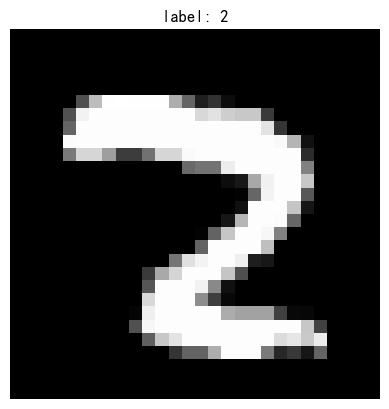

In [4]:
# Step 4: 可视化数据集中的某一张图像
image, label = trainset[28]

plt.imshow(image, cmap='gray')
plt.title(f"label: {label}")
plt.axis('off')
plt.show()

你刚刚看到的是：一张图像（集合A的一个元素）被映射到了一个数字标签（集合B的一个元素）。

这正是集合A到集合B的映射关系的体现！

---
**练习题：**

1. 请修改代码，显示第20张图像及其标签。
2. 你觉得图像和标签之间的关系像不像“函数”的概念？试着用自己的话解释。


### 3.1 子集的概念

在集合论中，**子集**是一个集合中“部分元素”组成的新集合。

例如，在训练集里，我们可以构造一个“只包含数字8”的子集 —— 即：所有图像中，标签为8的那些。

我们来试试怎么提取所有的数字8：

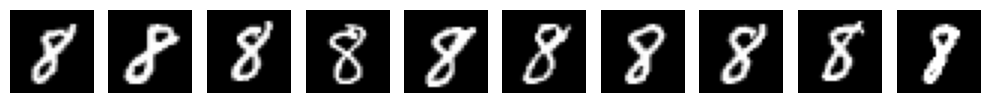

总共有 5851 张图片是数字8


In [5]:
indices_8 = [i for i, (_, lbl) in enumerate(trainset) if lbl == 8]

# 提取前10张“数字8”的图片
plt.figure(figsize=(10,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    img, _ = trainset[indices_8[i]]
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

print(f"总共有 {len(indices_8)} 张图片是数字8")


---
**练习题：**

1. 将上面代码改为提取“数字3”的子集。
2. 请你思考：数字8的图像构成了原始集合的一个子集，它满足什么样的条件？


## 4. 深度学习模型

现在我们已经了解了集合和映射的基本概念，也拿到了手写数字图片的训练数据 `trainset`，接下来我们来体验一下：**如何用深度学习模型识别这些数字**。

你不需要懂神经网络的原理，我们先当它是一个“神奇的函数”：
> **输入**一张图片 → **输出**一个预测的数字。

这一节我们要做三件事：

1. 下载一个已经训练好的模型  
2. 输入图片，查看模型输出的数字  
3. 对比模型输出与真实标签，看看准不准


### 4.1 下载预训练模型

我们使用一个训练好的 MNIST 分类器。


In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from PIL import Image
import numpy as np
from torch.utils.data import DataLoader

# 定义相同的模型结构
class MNIST_CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, 1)  # 输出: 16x26x26
        self.conv2 = nn.Conv2d(16, 32, 3, 1)  # 输出: 32x24x24
        self.pool = nn.MaxPool2d(2)  # 输出: 32x12x12
        self.fc1 = nn.Linear(32 * 5 * 5, 64)  # 修正维度
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))  # 输出: 32x5x5
        x = torch.flatten(x, 1)  # 展平为 32 * 12 * 12=4608
        x = F.relu(self.fc1(x))
        x = self.fc2(x)  # 输出10维，无需手动softmax
        return F.log_softmax(x, dim=1)

device = "cpu"
model = MNIST_CNN().to(device)
model.load_state_dict(torch.load("../model/mnist_cnn.pth", map_location=device))
model.eval()

MNIST_CNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=800, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)

### 4.2 从 `trainset` 中取出一张图片进行测试

我们之前使用了 `trainset` 来封装 MNIST 数据集，它已经包含图片和标签。现在我们从中选一张图像送入模型进行识别。


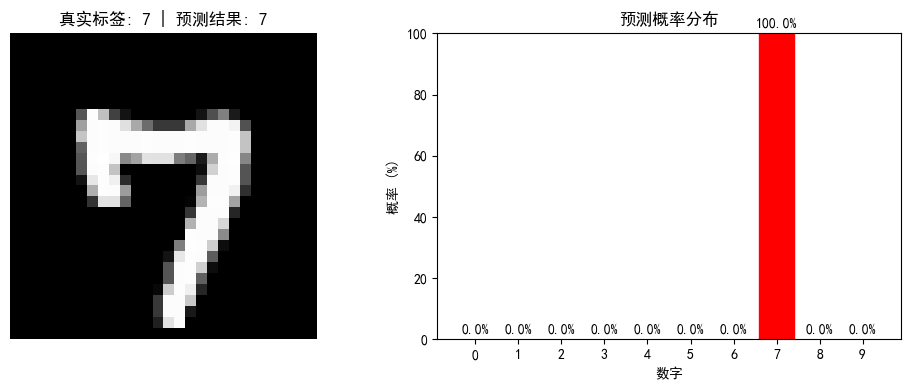

真实标签: 7
预测结果: 7
各类别概率:
数字 0: 0.00%
数字 1: 0.00%
数字 2: 0.00%
数字 3: 0.00%
数字 4: 0.00%
数字 5: 0.00%
数字 6: 0.00%
数字 7: 100.00%
数字 8: 0.00%
数字 9: 0.00%


In [7]:
# 加载预训练模型
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MNIST_CNN().to(device)
model.load_state_dict(torch.load("../model/mnist_cnn.pth", map_location=device))
model.eval()

# 加载MNIST测试集
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

testset = datasets.MNIST('../data', train=False, download=True, transform=transform)

# 创建DataLoader (batch_size=1)
imgloader = DataLoader(testset, batch_size=1, shuffle=True)

# 随机取出一张图片
data, target = next(iter(imgloader))

# 将数据移动到设备
data, target = data.to(device), target.to(device)

# 进行预测
with torch.no_grad():
    output = model(data)
    prediction = output.argmax(dim=1, keepdim=True)
    probabilities = F.softmax(output, dim=1)[0] * 100

# 转换为CPU numpy数组
image = data.cpu().squeeze().numpy()
probabilities = probabilities.cpu().numpy()

# 可视化结果
plt.figure(figsize=(10, 4))

# 显示图像
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title(f'真实标签: {target.item()} | 预测结果: {prediction.item()}')
plt.axis('off')

# 显示概率分布
plt.subplot(1, 2, 2)
bars = plt.bar(range(10), probabilities, color='skyblue')
plt.xticks(range(10))
plt.xlabel('数字')
plt.ylabel('概率 (%)')
plt.title('预测概率分布')
plt.ylim(0, 100)

# 标记预测结果
bars[prediction.item()].set_color('red')
for i, v in enumerate(probabilities):
    plt.text(i, v + 2, f"{v:.1f}%", ha='center')

plt.tight_layout()
plt.show()

print(f"真实标签: {target.item()}")
print(f"预测结果: {prediction.item()}")
print("各类别概率:")
for i, prob in enumerate(probabilities):
    print(f"数字 {i}: {prob:.2f}%")


你会看到：

- 图片：模型识别的目标（比如是数字3）
- 预测结果：模型认为图片上的数字是啥
- 真实标签：实际答案是什么

这样我们就完成了整个“输入图片 → 模型输出”的流程。

---
**练习题**：

1. 修改上面代码，尝试对5张图片进行预测，并统计模型预测准确率。
2. 用你自己的话解释一下：模型是如何“把图片转换成数字”的？你觉得它像不像函数？


## 4.3 彩蛋挑战：让模型“认错”！

找一张图像，故意加入噪声（如模糊、旋转、涂鸦），让模型识别错误。  
你可以修改图像，再送进模型看看它是否还认得出来。

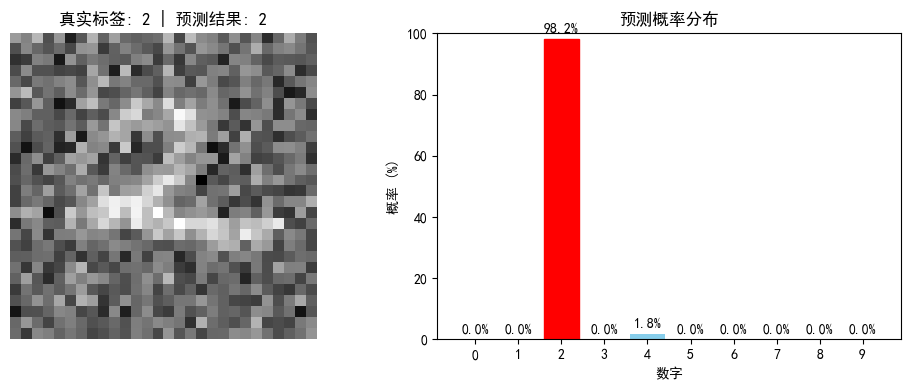

真实标签: 2
预测结果: 2
各类别概率:
数字 0: 0.00%
数字 1: 0.00%
数字 2: 98.16%
数字 3: 0.00%
数字 4: 1.83%
数字 5: 0.00%
数字 6: 0.00%
数字 7: 0.00%
数字 8: 0.00%
数字 9: 0.01%


In [8]:
# 随机取出一张图片
data, target = next(iter(imgloader))

noisy_data = data + torch.randn_like(data) * 1.2

# 将数据移动到设备
noisy_data, target = noisy_data.to(device), target.to(device)



# 进行预测
with torch.no_grad():
    output = model(noisy_data)
    prediction = output.argmax(dim=1, keepdim=True)
    probabilities = F.softmax(output, dim=1)[0] * 100

# 转换为CPU numpy数组
image = noisy_data.cpu().squeeze().numpy()
probabilities = probabilities.cpu().numpy()

# 可视化结果
plt.figure(figsize=(10, 4))

# 显示图像
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title(f'真实标签: {target.item()} | 预测结果: {prediction.item()}')
plt.axis('off')

# 显示概率分布
plt.subplot(1, 2, 2)
bars = plt.bar(range(10), probabilities, color='skyblue')
plt.xticks(range(10))
plt.xlabel('数字')
plt.ylabel('概率 (%)')
plt.title('预测概率分布')
plt.ylim(0, 100)

# 标记预测结果
bars[prediction.item()].set_color('red')
for i, v in enumerate(probabilities):
    plt.text(i, v + 2, f"{v:.1f}%", ha='center')

plt.tight_layout()
plt.show()

print(f"真实标签: {target.item()}")
print(f"预测结果: {prediction.item()}")
print("各类别概率:")
for i, prob in enumerate(probabilities):
    print(f"数字 {i}: {prob:.2f}%")
